In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train['Open'].values
training_set = training_set.reshape(len(training_set),1)

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [5]:
X_train, y_train = [], []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [6]:
# X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [7]:
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [8]:
from tensorflow.keras.layers import Dropout

In [9]:
ann.add(tf.keras.layers.Dense(units=50, activation='tanh'))
ann.add(Dropout(0.2))

In [10]:
ann.add(tf.keras.layers.Dense(units=50, activation='tanh'))
ann.add(Dropout(0.2))

In [11]:
ann.add(tf.keras.layers.Dense(units=50, activation='tanh'))
ann.add(Dropout(0.2))

In [12]:
ann.add(tf.keras.layers.Dense(units=50, activation='tanh'))
ann.add(Dropout(0.2))

In [13]:
ann.add(tf.keras.layers.Dense(units=1))

In [14]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 120)

Train on 1198 samples
Epoch 1/120
1198/1198 [==============================] - 1s 907us/sample - loss: 0.2117
Epoch 2/120
1198/1198 [==============================] - 0s 80us/sample - loss: 0.0608
Epoch 3/120
1198/1198 [==============================] - 0s 79us/sample - loss: 0.0438
Epoch 4/120
1198/1198 [==============================] - 0s 80us/sample - loss: 0.0305
Epoch 5/120
1198/1198 [==============================] - 0s 84us/sample - loss: 0.0240
Epoch 6/120
1198/1198 [==============================] - 0s 78us/sample - loss: 0.0202
Epoch 7/120
1198/1198 [==============================] - 0s 79us/sample - loss: 0.0177
Epoch 8/120
1198/1198 [==============================] - 0s 83us/sample - loss: 0.0139
Epoch 9/120
1198/1198 [==============================] - 0s 82us/sample - loss: 0.0144
Epoch 10/120
1198/1198 [==============================] - 0s 82us/sample - loss: 0.0124
Epoch 11/120
1198/1198 [==============================] - 0s 94us/sample - loss: 0.0116
Epoch 12/120
1198/

1198/1198 [==============================] - 0s 80us/sample - loss: 0.0036
Epoch 94/120
1198/1198 [==============================] - 0s 79us/sample - loss: 0.0031
Epoch 95/120
1198/1198 [==============================] - 0s 79us/sample - loss: 0.0038
Epoch 96/120
1198/1198 [==============================] - 0s 78us/sample - loss: 0.0036
Epoch 97/120
1198/1198 [==============================] - 0s 77us/sample - loss: 0.0035
Epoch 98/120
1198/1198 [==============================] - 0s 80us/sample - loss: 0.0036
Epoch 99/120
1198/1198 [==============================] - 0s 80us/sample - loss: 0.0036
Epoch 100/120
1198/1198 [==============================] - 0s 217us/sample - loss: 0.0037
Epoch 101/120
1198/1198 [==============================] - 0s 351us/sample - loss: 0.0035
Epoch 102/120
1198/1198 [==============================] - 0s 357us/sample - loss: 0.0030
Epoch 103/120
1198/1198 [==============================] - 0s 351us/sample - loss: 0.0035
Epoch 104/120
1198/1198 [============

In [16]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [17]:
realStockPrice = dataset_test['Open'].values
realStockPrice = realStockPrice.reshape(len(realStockPrice),1)

In [18]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [19]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [20]:
inputs = inputs.reshape(-1,1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [21]:
inputs = sc.transform(inputs)
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [22]:
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

In [23]:
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
predictedStockPrice = sc.inverse_transform(ann.predict(X_test))
predictedStockPrice

array([[771.13354],
       [767.04   ],
       [772.792  ],
       [775.70715],
       [784.2845 ],
       [786.4527 ],
       [784.6864 ],
       [782.68475],
       [785.49384],
       [787.28394],
       [787.2868 ],
       [793.5771 ],
       [791.12744],
       [788.7065 ],
       [784.18634],
       [790.61804],
       [797.15247],
       [802.4412 ],
       [807.15063],
       [800.12274]], dtype=float32)

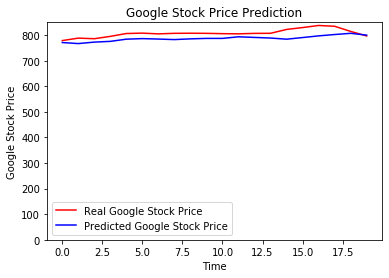

In [28]:
plt.plot(realStockPrice, color = 'red', label = 'Real Google Stock Price')
plt.plot(predictedStockPrice, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.ylim(0,850)
plt.legend()
plt.show()

In [26]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(realStockPrice, predictedStockPrice))

In [27]:
rmse

23.141034491263262